In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Initial Python environment setup...
import numpy as np # linear algebra
import pandas as pd # CSV file I/O (e.g. pd.read_csv)
import os # reading the input files we have access to

print(os.listdir('/content/drive/My Drive/'))
pd.options.display.max_columns = 60

['Colab Notebooks', 'pickle_topic', 'max_reach_df_compressed_1.pkl', 'max_reach_df_compressed_2.pkl', 'author_graph', 'dblp-ref-0.json', 'df_page_rank_actual_flatten_references.pkl', 'author_graph.gpickle', 'dsf-final', 'bigdf_1.pkl', 'reach_df_join.pkl']


In [3]:
train_df =  pd.read_json('/content/drive/My Drive/dblp-ref-0.json',lines=True)
train_df.dtypes

abstract      object
authors       object
id            object
n_citation     int64
references    object
title         object
venue         object
year           int64
dtype: object

There are 8 columns out of which 6 (abstract, authors, id, references, title, venue) are categorical. And remaining 2 (n_citiation, year) are numeric.

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
abstract      753646 non-null object
authors       1000000 non-null object
id            1000000 non-null object
n_citation    1000000 non-null int64
references    861480 non-null object
title         1000000 non-null object
venue         1000000 non-null object
year          1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 68.7+ MB


There are 1M entries in the dataset. The two columns (abstract, references) have some null values. Rest 6 columns don’t have any null values.

In [5]:
train_df.describe()

,n_citation,year
count,1000000.000000,1000000.000000
mean,30.875730,2006.365124
std,137.942473,7.833833
min,0.000000,1937.000000
25%,1.000000,2003.000000
50%,9.000000,2008.000000
75%,50.000000,2012.000000
max,73362.000000,2017.000000


In [6]:
train_df.head(5)

,abstract,authors,id,n_citation,references,title,venue,year
0,The purpose of this study is to develop a lear...,"[Makoto Satoh, Ryo Muramatsu, Mizue Kayama, Ka...",00127ee2-cb05-48ce-bc49-9de556b93346,0,"[51c7e02e-f5ed-431a-8cf5-f761f266d4be, 69b625b...",Preliminary Design of a Network Protocol Learn...,international conference on human-computer int...,2013
1,This paper describes the design and implementa...,"[Gareth Beale, Graeme Earl]",001c58d3-26ad-46b3-ab3a-c1e557d16821,50,"[10482dd3-4642-4193-842f-85f3b70fcf65, 3133714...",A methodology for the physically accurate visu...,visual analytics science and technology,2011
2,This article applied GARCH model instead AR or...,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",001c8744-73c4-4b04-9364-22d31a10dbf1,50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor...",pattern recognition and machine intelligence,2009
3,NaN,"[Jea-Bum Park, Byungmok Kim, Jian Shen, Sun-Yo...",00338203-9eb3-40c5-9f31-cbac73a519ec,0,"[8c78e4b0-632b-4293-b491-85b1976675e6, 9cdc54f...",Development of Remote Monitoring and Control D...,,2011
4,NaN,"[Giovanna Guerrini, Isabella Merlo]",0040b022-1472-4f70-a753-74832df65266,2,NaN,Reasonig about Set-Oriented Methods in Object ...,,1998


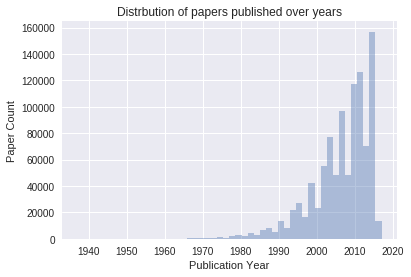

In [9]:
# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ax = sns.distplot(train_df['year'],kde=False,bins=50)
ax.set(xlabel='Publication Year', ylabel='Paper Count')
plt.title("Distrbution of papers published over years")
plt.show()

In [10]:
plottrain_df_morethan_50 = train_df[(train_df.n_citation>50)]
print (plottrain_df_morethan_50.shape)

(79025, 8)


In [ ]:
print (len(train_df[(train_df.n_citation>50)]))
print (len(train_df[(train_df.n_citation>300)]))

print (sorted(train_df['n_citation'].unique()))

In [12]:
train_df_plotlessthan1 = train_df[(train_df.n_citation<1)]
print (len(train_df_plotlessthan1))

train_df_plotlessthan50 = train_df[(train_df.n_citation>0) & (train_df.n_citation<50)]
print (len(train_df_plotlessthan50))

train_df_plot50 = train_df[(train_df.n_citation==50)]
print (len(train_df_plot50))

train_df_plotmorethan_50 = train_df[(train_df.n_citation>50)]
print (len(train_df_plotmorethan_50))


train_df_ploteq1 = train_df[(train_df.n_citation==1)]
print (len(train_df_ploteq1))

xlabels = ["Zero", "1 to 49","50","More than 50"]
ycount = [len(train_df_plotlessthan1), len(train_df_plotlessthan50), len(train_df_plot50), len(train_df_plotmorethan_50)]

print (xlabels)
print (ycount)

218975
421589
280411
79025
70313
['Zero', '1 to 49', '50', 'More than 50']
[218975, 421589, 280411, 79025]


In [14]:
train_df_plotmorethan_50 = train_df[(train_df.n_citation>10000)]
train_df_plotmorethan_50.head(3)

,abstract,authors,id,n_citation,references,title,venue,year
199442,NaN,"[Richard S. Sutton, Andrew G. Barto]",e0f3a738-4ab2-40d1-ba44-506d81c1d230,29285,NaN,Reinforcement Learning: An Introduction,neural information processing systems,1999
293245,Foreword. 1. Modelling Communication. 2. Basic...,[Robin Milner],3023929a-c93e-49c5-b03f-7fb0414d94df,11519,NaN,Communication and concurrency,,1989
299091,Preface 1. Background in linear algebra 2. Dis...,[Yousef Saad],34d4e37b-e575-4316-847b-d8a661b51473,13104,[],Iterative Methods for Sparse Linear Systems,,2003


In [15]:
print (len(train_df['venue'].unique()))
train_df_plotmorethan_50 = train_df[(train_df.n_citation>70000)]
print (type(train_df_plotmorethan_50['venue']))
print (train_df_plotmorethan_50['venue'].empty)

(train_df['venue'].values == '').sum()

4135
<class 'pandas.core.series.Series'>
False


210500

In [0]:
venuedf = train_df.groupby("venue")["id"].count()

In [17]:
print (type(venuedf))

<class 'pandas.core.series.Series'>


In [0]:
venue_df = train_df.groupby('venue')[['id']].count() # Produces Pandas DataFrame

In [19]:
print(len(venue_df))
print(len(venue_df[(venue_df.id>5000)]))

4135
5


In [20]:
df2 = venue_df[(venue_df.id>4000)].sort_values(by=['id'],ascending=False)
df2.rename(columns={"id": "Count of Papers"})

,Count of Papers
venue,
,210500
Lecture Notes in Computer Science,18950
conference of the international speech communication association,8886
international symposium on circuits and systems,7478
"international conference on acoustics, speech, and signal processing",6469
international conference on communications,4667
international joint conference on artificial intelligence,4562
national conference on artificial intelligence,4436
international conference on conceptual structures,4227
